<a href="https://colab.research.google.com/github/SandyLlapa/ML-Statistic/blob/main/SandyLlapa_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3

## Introduction

**What is the goal of this lab?**

In this lab you will practice running statistical tests to determine if a numeric variable has a statistically significant mean for different groups. In other words, does a categorical variable have any potential effect on the numeric variables?

**Context**

Statistical tests are an important first step before building any machine learning model. They help you better undestand the relationships between the variables that could be learned by a machine learning (ML) model. The better you understand these relationships in a data set, the more accurate of a ML model you can create.



### Data

This lab uses the Wine data set 🍷. It contains various measurements of wine made from 3 different categories of grapes grown in the [Piedmont](https://maps.app.goo.gl/mY1kGw27wTFmb4Sw6) region of Italy:
- [Barolo](https://en.wikipedia.org/wiki/Barolo)
- [Grignolino](https://en.wikipedia.org/wiki/Grignolino)
- [Barbera](https://en.wikipedia.org/wiki/Barbera)

You can see more information in the original research paper for the data set [Multivariate data analysis as a discriminating method of the
origin of wines](https://core.ac.uk/download/pdf/235693033.pdf).

In [ ]:
# Install package to download data sets from UCI ML Repo
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

In [ ]:
# Get the data set
wine = fetch_ucirepo(name="Wine")

In [ ]:
# Get raw data in a pandas.DataFrame format
wine_df = wine.data.original

In [ ]:
# Citation
print("Citation:\n", wine.metadata.additional_info.citation)

Citation:
 None


> _Aeberhard,Stefan and Forina,M. (1991). Wine._    
> _UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J._


In [ ]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print(wine.metadata.repository_url)

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/109/wine


## Problem Statement

**Describe chi squared test, t-tests, and ANOVA.**

> _Answer with text here_

The chi-squared test is a statistical procedure used to determine the difference between expected and observed data.

The t-test is a statistical procedure used to determine the significant difference between the means of two groups and how they may relate.

ANOVA is a statistical procedure used to assess the difference between the means of more than two groups.

**How can ANOVA help understand the difference between types of grapes used to make wine?**

> _Answer with text here_

ANOVA is often used to test a hypothesis between groups; in this case, it would be grapes and their chemical analysis. Using ANOVA will help to determine if there is any statistically significant result in the chemical analysis based on the grape type, which are derived from different cultivars.

**Describe what a Tukey's HSD (honestly significant difference) test is and when it should be used.**



> _Answer with text here_

Tukey's HSD test is used to determine differences among sample means for significance and should be used when you want to identify which groups are significantly different from each other.

**What is a Bonferroni correction and when should it be used?**

> _Answer with text here_

The Bonferroni correction is a statistical method that adjusts the significance level to prevent the likelihood of false positives. The Bonferroni correction should be used when multiple hypothesis tests are conducted simultaneously.

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection

Print out the following details about the data:
- The first 5 rows of the data set
- Number of rows and columns
- Data type of each column
- Number of null values (or not-null values) in each column
- General statistics of each numeric column (min, max, mean, standard deviation)

---

**Hints**

- [`pandas.DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`pandas.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
# Answer with code here

firstFiveRows = wine_df.head(5)
numberRowsCols = wine_df.shape
dataCols = wine_df.dtypes
numNullValues = wine_df.isnull().sum()
generalStat = wine_df.describe()

print("The first 5 rows of the data set: \n",firstFiveRows)
print("*******************************************")
print("Numbers of rows and columns: \n",numberRowsCols)
print("*******************************************")
print("Data type of each columns: \n",dataCols)
print("*******************************************")
print("Number of null values in each column: \n",numNullValues)
print("*******************************************")
print("General Statistics: \n",generalStat)



The first 5 rows of the data set: 
    Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines 

### Data cleaning

The `"class"` column of `wine_df` is currently a numeric index that represents 3 different categories of grapes. In the `"class"` column, replace 1 with *'Barolo'*, 2 with *'Grigonlino'*, and 3 with *'Barbera'*.

```python
{
    1: 'Barolo',
    2: 'Grignolino',
    3: 'Barbera'
}
```
---
**Hints**

- [`pandas.Series.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html)

In [ ]:
# Answer with code here

wine_df['class']= wine_df['class'].replace({1:'Barolo', 2:'Grignolino', 3:'Barbera'})

# print(wine_df['class'])

One of the column names `class` is a keyword in Python and causes problems in the statsmodels package functions. Also the column name `0D280_0D315_of_diluted_wines` is long and confusing. Rename these columns from _'class'_ to _'Grape'_ and _'0D280\_0D315\_of\_diluted_wines'_ to _'Optical\_density'_.

```python
{
    'class': 'Grape',
    '0D280_0D315_of_diluted_wines': 'Optical_density'
}
```
---
**Hints**
- [`pandas.DataFrame.rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

In [ ]:
# Answer with code here

wine_df = wine_df.rename(columns = {
    'class': 'Grape',
    '0D280_0D315_of_diluted_wines': 'Optical_density'

})

# print(wine_df)

### Data Visualization and Statistics

Count the number of observations (rows) of each type of grape.

---
**Hints**
- [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- [`pandas.DataFrame.count()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html)

In [ ]:
# Answer with code here

grapeCount = wine_df.groupby('Grape').count()

print("Grape count: \n",grapeCount)

Grape count: 
             Alcohol  Malicacid  Ash  Alcalinity_of_ash  Magnesium  \
Grape                                                               
Barbera          48         48   48                 48         48   
Barolo           59         59   59                 59         59   
Grignolino       71         71   71                 71         71   

            Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
Grape                                                                          
Barbera                48          48                    48               48   
Barolo                 59          59                    59               59   
Grignolino             71          71                    71               71   

            Color_intensity  Hue  Optical_density  Proline  
Grape                                                       
Barbera                  48   48               48       48  
Barolo                   59   59               59      

Plot the distribution of each variable for each type of grape, and a scatter plot between each pair of numeric variables.

This is a lot of graphs! But it can be easily done with one line of code from the seaborn package.

---
**Hints**
- [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
    - Set the argument `hue="grape"`

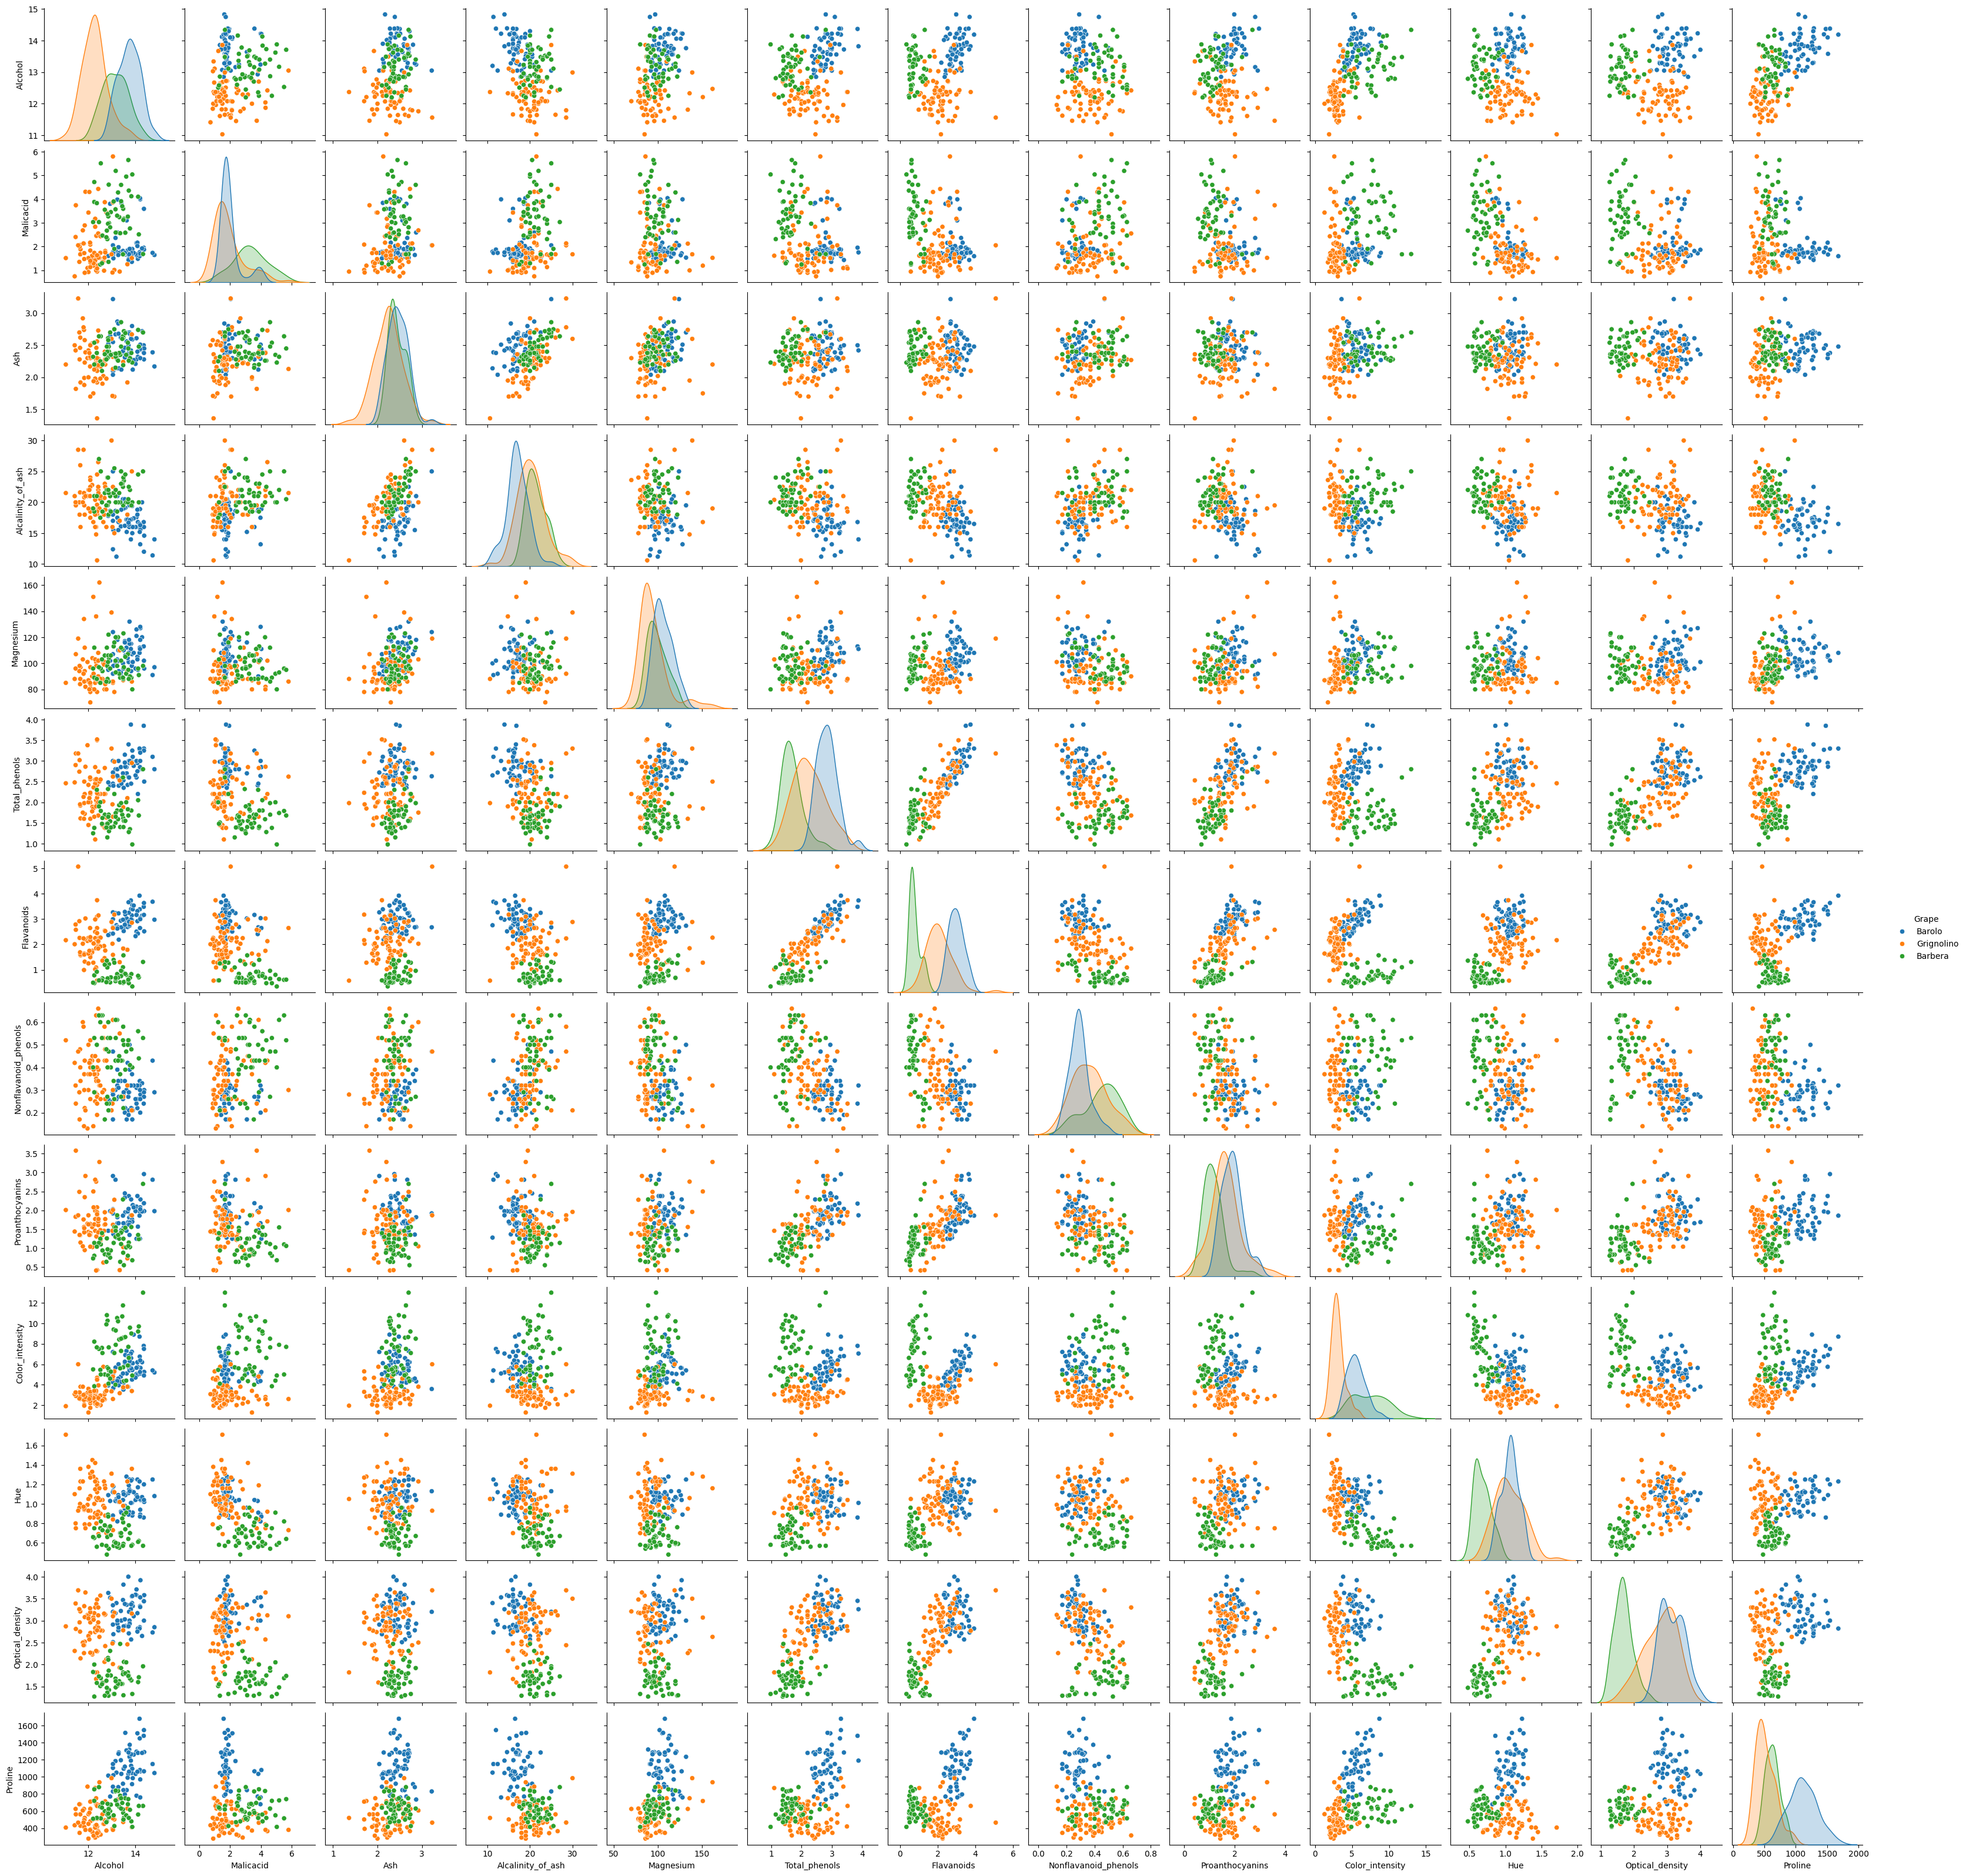

In [ ]:
# Answer with code here
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine_df,hue="Grape")

#takes a long time to execute



Create a [correlation matrix](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices) [heatmap](https://en.wikipedia.org/wiki/Heat_map) for all the numeric variables.

First, drop the `"grape"` column to only have the numeric columns Then create a correlation matrix, where each row and column of the matrix represents a numeric column from the data, and the values in the matrix are the correlations between row-variable and column-variable.

Second, plot the correlation matrix in a heat map to better visualize the correlations:
- Run `plt.figure(figsize=(12, 10))` to increase the size of the graph to make it more readable.
- In the `sns.heatmap()` function set `annot=True` to include the numeric labels in the heat maps and `cmap="coolwarm"` to change the color mapping.

---
**Hints**

- [`pandas.DataFrame.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
- [`pandas.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
- [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Axes: >

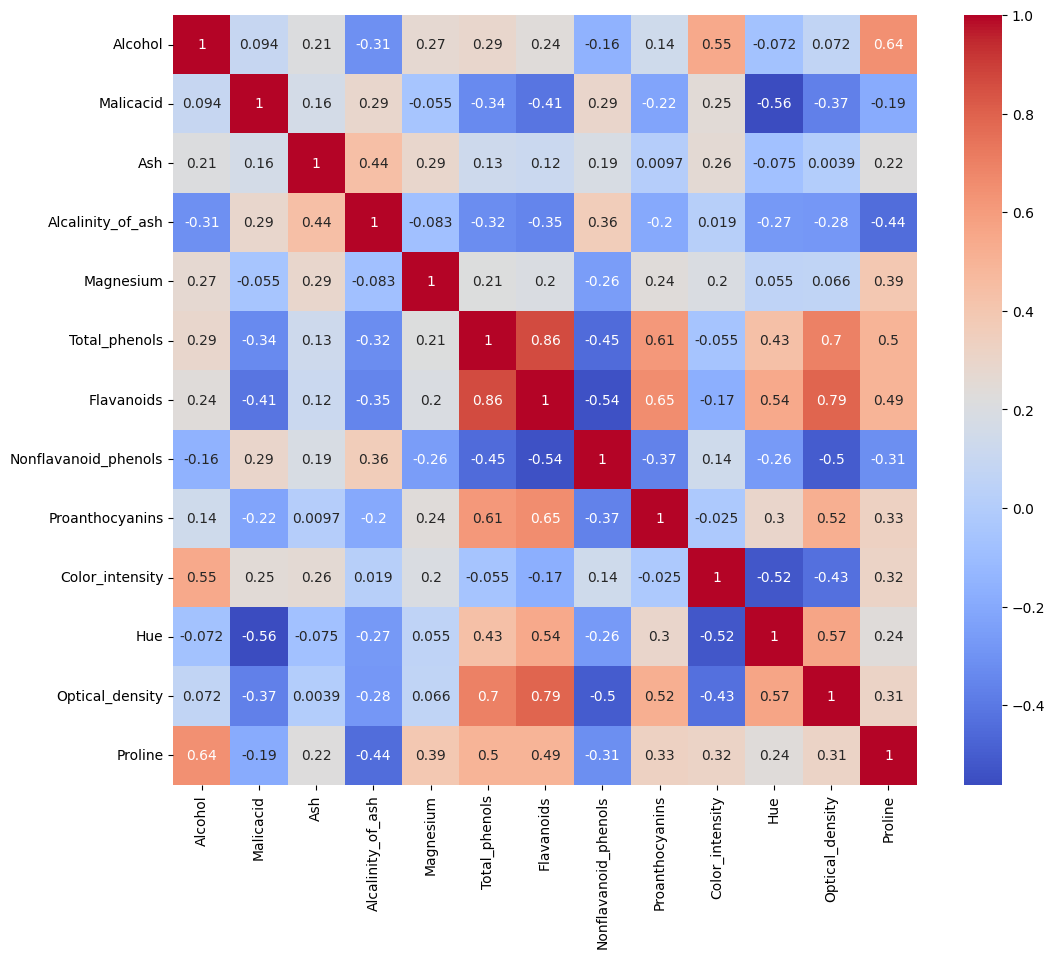

In [ ]:
# Answer with code here

numericCol = wine_df.drop(columns=['Grape'])
matrix = numericCol.corr()

plt.figure(figsize=(12,10))
sns.heatmap(matrix,annot=True,cmap="coolwarm")


## Models

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### ANOVA

Use the [`statsmodels`](https://www.statsmodels.org/stable/index.html) package to run ANVOA with the `"Grape"` categorical variable against every other variable in the data set. For each variable, print out the F-statistic, p-value, and if the relationship is significant at a level of 0.01.

---
**Hints**
- [`statsmodles.formula.api.ols()`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols)
- [`statsmodels.api.stats.anova_lm()`](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)
- [`statsmodels.stats.multicomp.pairwise_tukeyhsd()`](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

In [ ]:
# Answer with code here

significant=[]
for col in numericCol.columns:
  dataset = sm.formula.ols(f'{col} ~ C(Grape)',data=wine_df).fit()

  table= sm.stats.anova_lm(dataset, typ=2)

  fstat=table["F"][0]
  p_value=table["PR(>F)"][0]

  print(f"F-statistic: {fstat}\nP-value: {p_value}\n")

  if (p_value < 0.01):
      print("Significant\n")
      significant.append(col)

  else:
      print("Not Significant\n")



<ipython-input-49-916942e1050d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fstat=table["F"][0]
<ipython-input-49-916942e1050d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value=table["PR(>F)"][0]
<ipython-input-49-916942e1050d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fstat=table["F"][0]
<ipython-input-49-916942e1050d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future v

F-statistic: 135.07762424279682
P-value: 3.319503795622649e-36

Significant

F-statistic: 36.94342496318372
P-value: 4.127228798041606e-14

Significant

F-statistic: 13.312901199990792
P-value: 4.1499679747941215e-06

Significant

F-statistic: 35.77163740730977
P-value: 9.444472938823199e-14

Significant

F-statistic: 12.429584338149581
P-value: 8.963395439253527e-06

Significant

F-statistic: 93.733009620367
P-value: 2.1376700154387676e-28

Significant

F-statistic: 233.92587268154875
P-value: 3.598585830714218e-50

Significant

F-statistic: 27.575417146966043
P-value: 3.888040900478434e-11

Significant

F-statistic: 30.27138317022749
P-value: 5.125358737547174e-12

Significant

F-statistic: 120.6640184410034
P-value: 1.1620080219274704e-33

Significant

F-statistic: 101.31679539029986
P-value: 5.9176622163624384e-30

Significant

F-statistic: 189.97232057888874
P-value: 1.3931049569430677e-44

Significant

F-statistic: 207.92037390217826
P-value: 5.783168356104645e-47

Significant



<ipython-input-49-916942e1050d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fstat=table["F"][0]
<ipython-input-49-916942e1050d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value=table["PR(>F)"][0]
<ipython-input-49-916942e1050d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fstat=table["F"][0]
<ipython-input-49-916942e1050d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future v

#### Tukey HSD

For each variable that was significant in the ANOVA analysis, use the [`statsmodels`](https://www.statsmodels.org/stable/index.html) package to run a pairwise Tukey HSD test to determine which categories of different from each other with respect to each numeric variable.

---
**Hints**
- [`statsmodels.stats.multicomp.pairwise_tukeyhsd()`](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html#statsmodels.stats.multicomp.pairwise_tukeyhsd)

In [ ]:
# Answer with code here

for ele in significant:

  tukey = pairwise_tukeyhsd(endog=wine_df[ele],groups=wine_df['Grape'],alpha=0.01)
  print(wine_df[ele].name)
  print(tukey)

Alcohol
  Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1   group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Barbera     Barolo    0.591   0.0  0.2973  0.8847   True
Barbera Grignolino   -0.875   0.0 -1.1574 -0.5926   True
 Barolo Grignolino   -1.466   0.0 -1.7322 -1.1998   True
--------------------------------------------------------
Malicacid
   Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Barbera     Barolo  -1.3231    0.0 -1.8636 -0.7825   True
Barbera Grignolino  -1.4011    0.0 -1.9207 -0.8814   True
 Barolo Grignolino   -0.078 0.8855 -0.5679  0.4119  False
---------------------------------------------------------
Ash
   Multiple Comparison of Means - Tukey HSD, FWER=0.01   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------

## Conclusion

**What does the F-statistic and p-value of an ANOVA test represent? How should they be interpreted generally? What does a low p-value (< 0.01) mean in the context of this data?**

> _Answer with text here_

An F-statistic is the ratio of the variance between sample means to the variance within samples. If the F-statistic is larger, it indicates greater variation between sample means compared to within the samples. The p-value in ANOVA represents whether the differences between group means are statistically significant. If the p-value is less than 0.05, we can conclude that there is a significant difference between the group means. In the context of our data, we can conclude that the different grape origins have a significant difference in their chemical components.





**What does the adjusted p-value represent in a Tukey HSD test represent? What does it mean if this value is very low?**

> _Answer with text here_

The adjusted p-value in the Tukey HSD test represents whether the group comparisons are statistically significant. If the adjusted p-value is low, it indicates that the difference between the two groups is statistically significant.


**Write a paragraph interpreting the results of the ANOVA analysis. Based on these results which variables might be useful if we were trying to predict which grape each wine is made from?**

> _Answer with text here_

Based on the low p-values and high F-statistics, it can be concluded that there is a statistically significant difference between the groups of grapes. The Tukey HSD test provides more details on which groups have a higher mean than others. For example, in the variable "Alcohol," it can be determined that Barbera has a higher mean than Barolo but a lower mean than Grignolino. To identify Barolo in this comparison, it has the smallest mean. Another useful variable is "Hue." The data suggests that there is no significant difference in Hue between Barolo and Grignolino. Barbera differs in Hue compared to Barolo and Grignolino, as the null hypothesis is not rejected. Additionally, the variable "Flavonoids" can be helpful in identifying the different groups of grapes. From the results, the mean differences between Grignolino and Barolo show that Grignolino has a higher mean than Barolo. However, Barbera has a higher mean than Grignolino.

**Do the results from the ANOVA tests match your expecations after reviewing the graphs made in the exploratory data analysis? Explain why or why not.**

> _Answer with text here_

In the scatterplot, the variables alcohol, flavonoids, and hue show that the data points for each of the grapes do not often overlap. This aligns with my finding that alcohol, flavonoids, and hue are good variables for distinguishing between the groups of grapes. Additionally, variables like ash and magnesium have data points that often overlap. Similarly, in the Tukey HSD tests, the variables ash and magnesium have high p-adj values, indicating there is no statistical difference, making it difficult to distinguish between the groups of grapes.